In [1]:
import tensorflow as tf
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time
import math
import cv2

In [24]:
def display(img, x1=0, y1=0, x2=0, y2=0, s=121):

    plt.axis('off')
    plt.subplot(121)
    plt.imshow(img)
    plt.plot(x1, y1,'bo',label="point")
    plt.plot(x2, y2,'bo',label="point")
    
    plt.show()

def jump(name, isLeft=0):
#     t1 = time.clock()
#     os.popen('adb shell screencap /sdcard/screen.png')
#     time.sleep(1)
#     os.popen('adb pull /sdcard/screen.png')
#     time.sleep(1)
#     t2 = time.clock()
#     print("%f"%((t2-t1)))
    with tf.gfile.FastGFile('model/classify_image_graph_def.pb', 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        tf.import_graph_def(graph_def, name='')


    t2 = time.clock()
#     print("%f"%((t2-t1)))
    with tf.Session() as sess:
        bottleneck_tensor_name = 'pool_3/_reshape:0'
        input_data_tensor = sess.graph.get_tensor_by_name(bottleneck_tensor_name)

        box = (150, 700, 930, 1400)
#         img = Image.open('screen.png')
#         img = Image.open('1514815799.8283634.png')
        img = Image.open(name)
#         img = Image.open('1514816401.55278.png')
        roi = img.crop(box)
        roi.save('tmp.png')
        img = cv2.imread('tmp.png')
        canny = cv2.Canny(img, 10, 100)
        cv2.imwrite('tmp2.png',canny)
        f = tf.gfile.FastGFile('tmp2.png', 'rb')
        image_data = f.read()
        data_tensor = sess.run(input_data_tensor,{'DecodeJpeg/contents:0': image_data})#图片格式是jpg格式

#         data_list.append(data_tensor[0])
    t2 = time.clock()
#     print("%f"%((t2-t1)))
    print('--data--')
    with tf.Session() as sess:
        with open('./jump_1.pb', 'rb') as f:
            graph_def = tf.GraphDef()
            graph_def.ParseFromString(f.read()) 

            batch_xs = data_tensor[0]
            batch_xs = batch_xs.reshape(-1, 2048)
#             print(batch_xs)
            output = tf.import_graph_def(graph_def, input_map={'input/x:0':batch_xs, 'input/k':1.0}, return_elements=['layer/out/p/output:0'], name='a') 
            out = sess.run(output)
#             print(out)
            dx = out[0][0][0] - out[0][0][2]
            dy = out[0][0][1] - out[0][0][3]
            x11 = 300 + out[0][0][0]*300
            y11 = 300 + out[0][0][1]*300
            x12 = 300 + out[0][0][2]*300
            y12 = 300 + out[0][0][3]*300
            lr = out[0][0][4]
            cc = out[0][0][5]
            d= dx*dx + dy*dy
            c = math.sqrt(d)
            c = c*300*2.75
            t = int(c)
#             print(lr)
            cmd = 'adb shell input swipe 500 500 501 501 ' + str(int(t))
#             os.popen(cmd)

    tf.reset_default_graph()
    with tf.Session() as sess:
        with open('./jump_2.pb', 'rb') as f:
            graph_def = tf.GraphDef()
            graph_def.ParseFromString(f.read()) 

            batch_xs = data_tensor[0]
            batch_xs = batch_xs.reshape(-1, 2048)
#             print(batch_xs)
            output = tf.import_graph_def(graph_def, input_map={'input/x:0':batch_xs, 'input/k':1.0}, return_elements=['layer/out/p/output:0'], name='a') 
            out = sess.run(output)
#             print(out)
            dx = out[0][0][0] - out[0][0][2]
            dy = out[0][0][1] - out[0][0][3]
            x21 = 300 + out[0][0][0]*300
            y21 = 300 + out[0][0][1]*300
            x22 = 300 + out[0][0][2]*300
            y22 = 300 + out[0][0][3]*300
            lr = out[0][0][4]
            cc = out[0][0][5]
            d= dx*dx + dy*dy
            c = math.sqrt(d)
            c = c*300*2.75
            t = int(c)
#             print(lr)
            cmd = 'adb shell input swipe 500 500 501 501 ' + str(int(t))
#             os.popen(cmd)
    t2 = time.clock()

    img = Image.open(name)
    s = 2
    if isLeft == 1:
        display(img,s*x11,s*y11,s*x12,s*y12, 121)
    else :
        display(img,s*x21,s*y21,s*x22,s*y22, 121)
    t2 = time.clock()


--data--


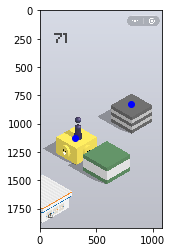

--data--


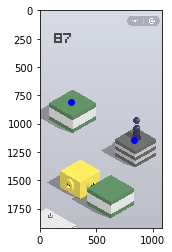

--data--


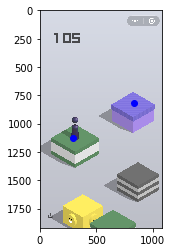

--data--


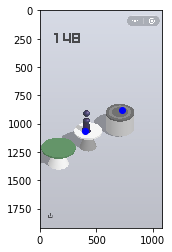

--data--


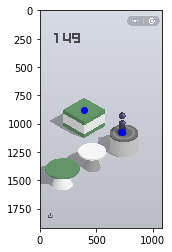

--data--


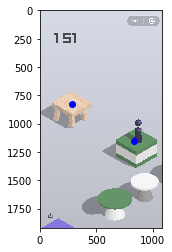

In [23]:
jump('001.png',0)
jump('002.png',1)
jump('003.png',0)
jump('004.png',0)
jump('005.png',1)
jump('006.png',1)